In [16]:
import numpy
import os
import matplotlib.pyplot as plt
import cv2

In [2]:
IMG_PATH = "./experiment images/"

In [3]:
m_vr = []
for version in os.listdir(IMG_PATH):
    m_vr.append(IMG_PATH+version+'/')

In [4]:
m_vr

['./experiment images/3.1/', './experiment images/4.0/']

In [7]:
m_s_path = {}  # Dictionary to store image paths

for i in m_vr:  # Iterate over base directories
    for img_folder in os.scandir(i):  # Iterate over subfolders
        img_list = []  # Create a list to store image paths for each folder
        for img_files in os.scandir(img_folder):  # Iterate over image files
            img_list.append(img_files.path)  # Append image path to the list
        
        m_s_path[img_folder.path] = img_list

In [12]:
m_s_path

{'./experiment images/3.1/with': ['./experiment images/3.1/with\\1.png',
  './experiment images/3.1/with\\2.png',
  './experiment images/3.1/with\\3.png',
  './experiment images/3.1/with\\4.png'],
 './experiment images/3.1/without': ['./experiment images/3.1/without\\1.png',
  './experiment images/3.1/without\\2.png',
  './experiment images/3.1/without\\3.png',
  './experiment images/3.1/without\\4.png'],
 './experiment images/4.0/with': ['./experiment images/4.0/with\\1.png',
  './experiment images/4.0/with\\2.png',
  './experiment images/4.0/with\\3.png',
  './experiment images/4.0/with\\4.png'],
 './experiment images/4.0/without': ['./experiment images/4.0/without\\1.png',
  './experiment images/4.0/without\\2.png',
  './experiment images/4.0/without\\3.png',
  './experiment images/4.0/without\\4.png']}

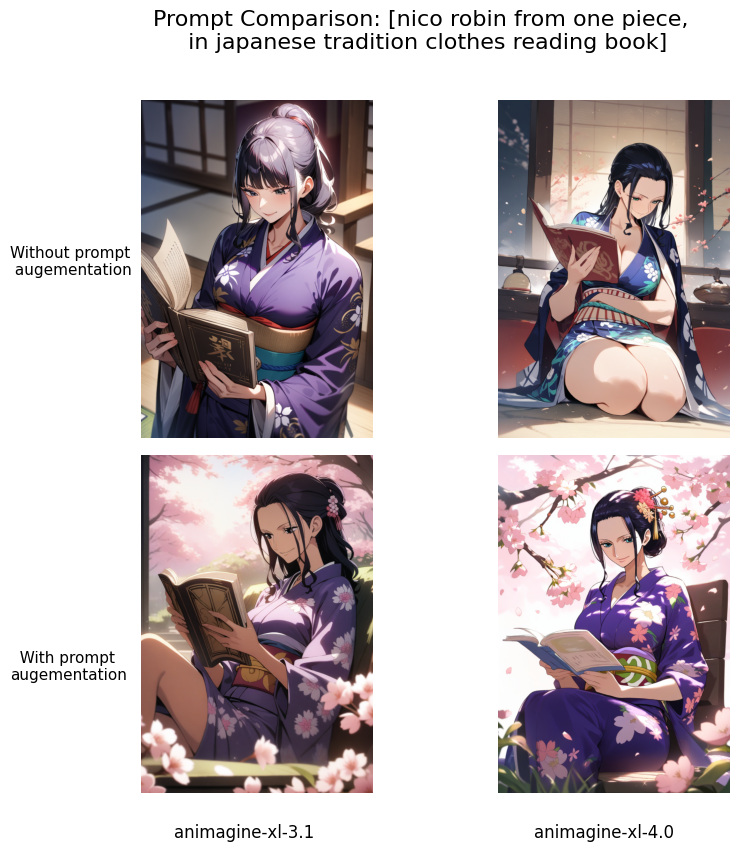

In [80]:
image_dict = m_s_path
promp_0 = "nico robin from one piece, \n in japanese tradition clothes reading book"

def show(idx, image_dict, prompt): 
    # For image "1.png", use index 0
    idx = idx

    # Load images following the desired order:
    # Top-left: 3.1 without
    img_31_without = cv2.imread(image_dict['./experiment images/3.1/without'][idx])
    img_31_without = cv2.cvtColor(img_31_without, cv2.COLOR_BGR2RGB)

    # Top-right: 4.0 without
    img_40_without = cv2.imread(image_dict['./experiment images/4.0/without'][idx])
    img_40_without = cv2.cvtColor(img_40_without, cv2.COLOR_BGR2RGB)

    # Bottom-left: 3.1 with
    img_31_with = cv2.imread(image_dict['./experiment images/3.1/with'][idx])
    img_31_with = cv2.cvtColor(img_31_with, cv2.COLOR_BGR2RGB)

    # Bottom-right: 4.0 with
    img_40_with = cv2.imread(image_dict['./experiment images/4.0/with'][idx])
    img_40_with = cv2.cvtColor(img_40_with, cv2.COLOR_BGR2RGB)


    # Create 2x2 subplots
    fig, axes = plt.subplots(2, 2, figsize=(9, 9))

    # Place the images in the grid
    axes[0, 0].imshow(img_31_without)  # Top-left: 3.1 without
    axes[0, 0].axis("off")

    axes[0, 1].imshow(img_40_without)  # Top-right: 4.0 without
    axes[0, 1].axis("off")

    axes[1, 0].imshow(img_31_with)     # Bottom-left: 3.1 with
    axes[1, 0].axis("off")

    axes[1, 1].imshow(img_40_with)     # Bottom-right: 4.0 with
    axes[1, 1].axis("off")

    # Remove individual subplot spacing
    plt.subplots_adjust(wspace=0.05, hspace=0.05)

    # Add axis labels on the figure
    # X-axis labels (versions) placed at the bottom
    fig.text(0.30, 0.06, 'animagine-xl-3.1', ha='center', fontsize=12)
    fig.text(0.70, 0.06, 'animagine-xl-4.0', ha='center', fontsize=12)

    # Y-axis labels (categories) placed at the left
    fig.text(0.04, 0.70, 'Without prompt \n augementation', va='center', rotation='horizontal', fontsize=11)
    fig.text(0.04, 0.25, '  With prompt \naugementation', va='center', rotation='horizontal', fontsize=11)

    # Add a title on top of the plot
    plt.suptitle(f"Prompt Comparison: [{prompt}]", fontsize=16)
    plt.savefig(f"plot{idx}", dpi = 300)
    plt.show()
    

    
show(0, image_dict, promp_0)

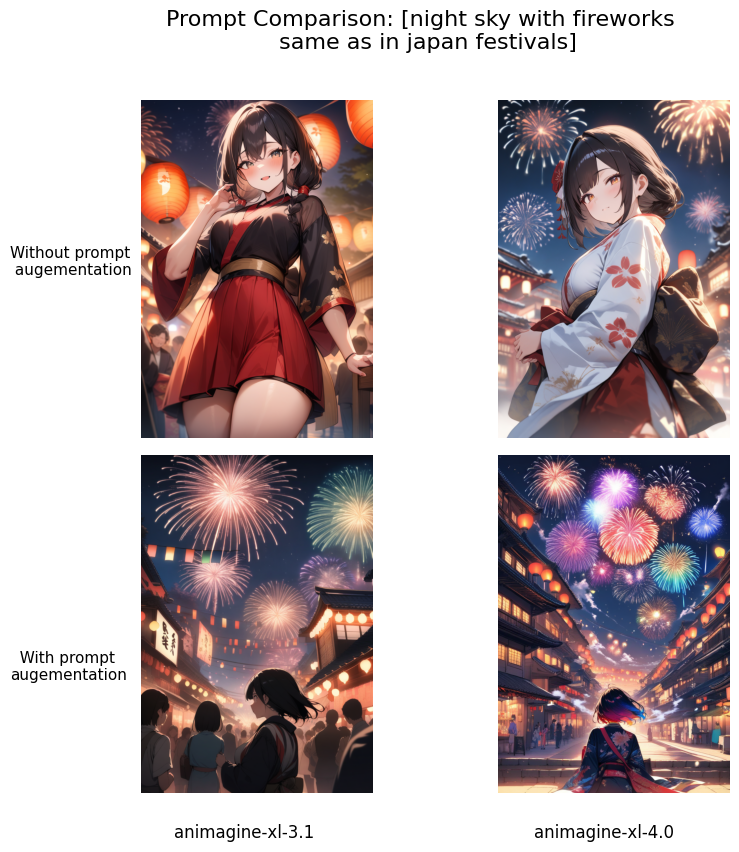

In [81]:
prompt_1 = "night sky with fireworks \n same as in japan festivals"
show(1,image_dict, prompt_1)

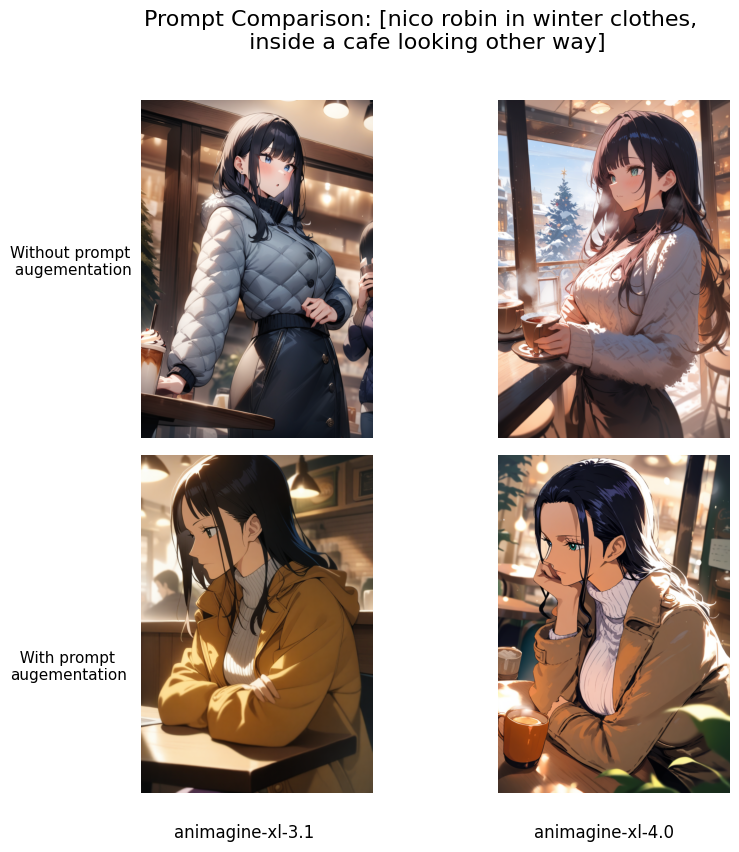

In [82]:
prompt_2 = "nico robin in winter clothes, \n inside a cafe looking other way"
show(2, image_dict, prompt_2)

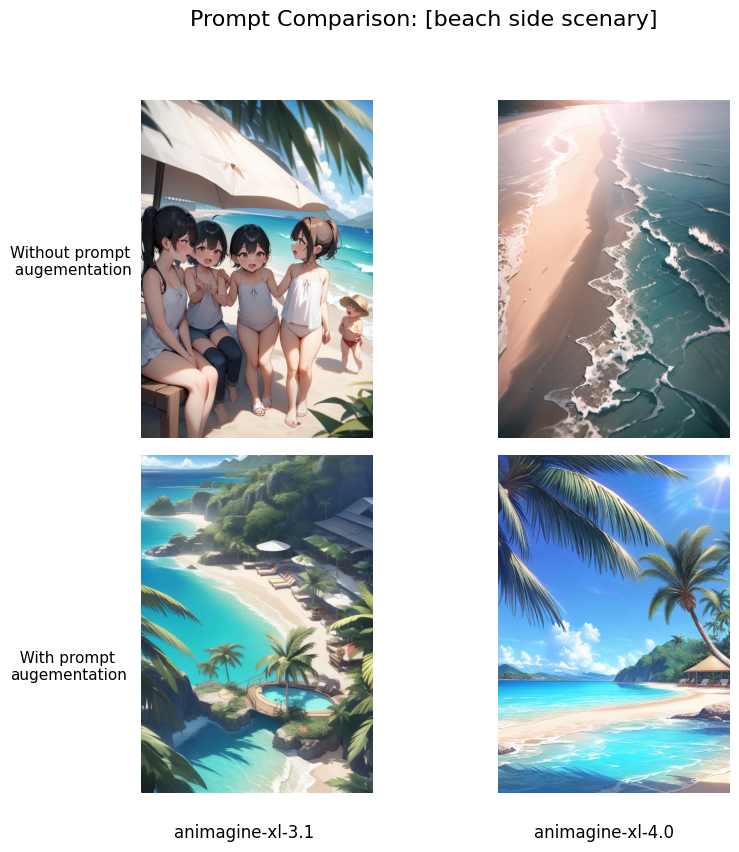

In [83]:
prompt_3 = "beach side scenary"
show(3, image_dict, prompt_3)